## Support Vector Regression (SVR)

### Import the libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset

In [71]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

print(x)

# return 1D 
print(y)

# reshape y into 2D array (same format as x)
y = y.reshape(len(y),1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### Feature Scaling
* perform feature scaling for y(dependent variable : salary), since salary value is much higher then x(level 1-10). 
> we reshaped y above since we need an unique format to perform standardization : StandardScaler()

In [72]:
# feature scaling tool
from sklearn.preprocessing import StandardScaler

# DO NOT USE SAME sc for both! 
# each has different mean, so can't use same sc! 
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

print(x)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [73]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the SVR model on the whole dataset

In [74]:
from sklearn.svm import SVR

# create SVR regressor model
# parameter is kerner, kerner name is 'rbf'
regressor = SVR(kernel = 'rbf')

# train the regressor model 
regressor.fit(x,y)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting a new result
* predict new scale of y after the transformation(feature scaling)
> parameter in predict() should be transformed as x above, since our model is trained with the dataset after the feature scaling 

* We need to reverse the scaling to get a predicted result
> reversing scaling method : inverse_transform()

* Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [78]:
regressor.predict(sc_x.transform([[6.5]]))

array([-0.27861589])

In [79]:
# We need to reverse the scaling to get a predicted result!
# we must apply reverse the scaling 
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

### Visualising the SVR results

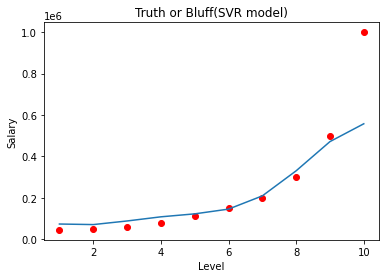

In [91]:
# # we must apply reverse the scaling to viz 
# real dataset
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color = 'r')

# predicted result
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)) )

plt.title('Truth or Bluff(SVR model)')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.show()

### Visualising the SVR results (for higher resolution and smoother curve)

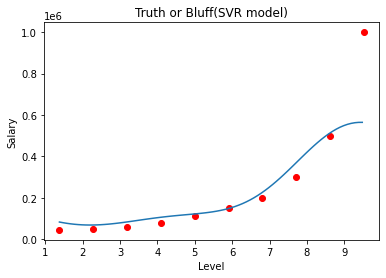

In [101]:
 # make the curve smoother 
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color = 'r')

plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)) )

plt.title('Truth or Bluff(SVR model)')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.show()
